# Linear Regression Predict House Price

# Author: Na Qian

# Import necessary packages

In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set_style('whitegrid')
from pylab import rcParams
rcParams['figure.figsize'] = (15,6)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Acquire data and perform light modifications

In [3]:
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vQuE3VHZCSebNyAqbOp9trWkwPw9FfDX59Zd_Ka9HLisxat1wTPpZGuIBgLICZBcBB7ai7Rv8HajBFB/pub?gid=573019161&single=true&output=csv"
df= pd.read_csv(data_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         1460 non-null   int64
 1   SF         1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [5]:
df.head(5)

,Id,SF,SalePrice
0,1,4316,755000
1,2,4476,745000
2,3,3627,625000
3,4,2364,611657
4,5,2822,582933


This data set has 1460 rows and 3 columns.

Id-- The id of this record

SF-- The square feet of the room

SalePrice: The price of the room

In [6]:
#Change all data set into lowercase 
df.rename(columns=lambda x: x.lower(), inplace=True)

In [7]:
df.sf.sort_values().head(10)

1047      0
76        0
1406      0
266       0
1456    334
1448    438
1458    480
1438    520
1404    520
1395    605
Name: sf, dtype: int64

In [8]:
df.sf.sort_values().tail(10)

18     3228
24     3238
7      3279
38     3447
118    3493
2      3627
0      4316
1      4476
538    4676
754    5642
Name: sf, dtype: int64

In [9]:
df.saleprice.sort_values()

1459     34900
1458     35311
1457     37900
1456     39300
1455     40000
         ...  
4       582933
3       611657
2       625000
1       745000
0       755000
Name: saleprice, Length: 1460, dtype: int64

In [10]:
#drop the record where sf=0
df =df[df['sf'] !=0]

# Explore numerical variables

Text(0.5, 0, 'sale price($)')

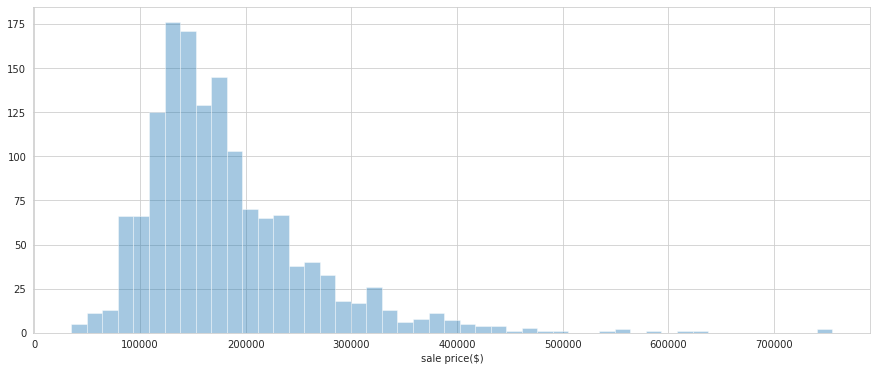

In [11]:
sns.distplot(df["saleprice"],kde=False)
plt.xlabel('sale price($)')

Text(0.5, 0, 'squarefeet')

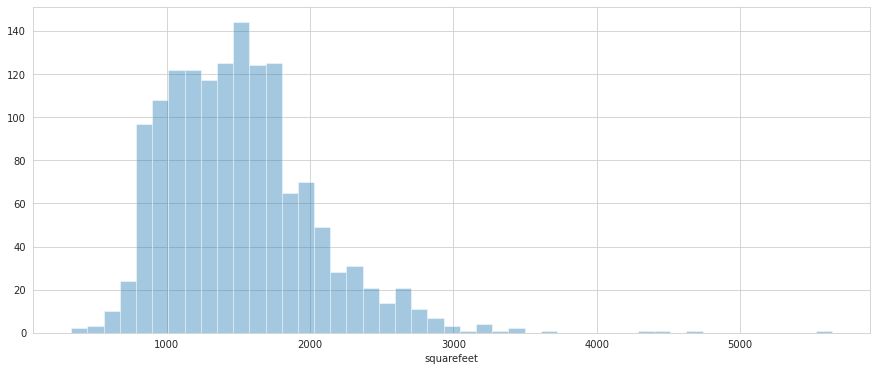

In [12]:
sns.distplot(df["sf"], kde=False)
plt.xlabel('squarefeet')

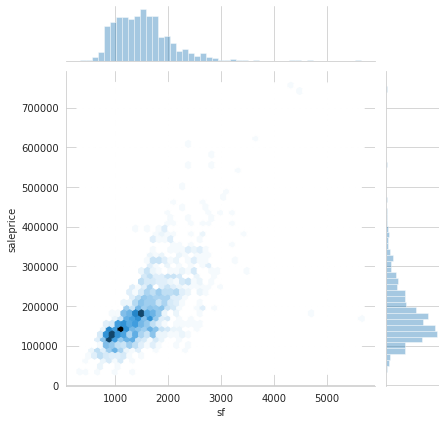

In [13]:
sns.jointplot(x="sf",y="saleprice",data=df,kind="hex")


# Describe Regression approach

In [14]:
X=df[['sf']]
y= df['saleprice']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [16]:
lin_reg = LinearRegression()

In [17]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
saleprice_y_pred = lin_reg.predict(X_test)

Take the results from above and print out a few pieces of information

In [19]:
print((pd.DataFrame(saleprice_y_pred, columns={'y_prediction'}).head(5)))
print()

    y_prediction
0  358047.981565
1  277288.833822
2  194968.620080
3  192262.772346
4  171656.701144



In [20]:
print('Coefficients: \n', lin_reg.coef_)

Coefficients: 
 [104.07106668]


In [21]:
print('Intercept: \n',lin_reg.intercept_)

Intercept: 
 22106.57832785751


In [22]:
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, saleprice_y_pred))


Mean Squared Error (MSE):3267141043.33


In [23]:
print('Variance Score (R^2):%.2f' % r2_score(y_test, saleprice_y_pred))

Variance Score (R^2):0.54


Re-plot the graph using the results from Scikit-Learn

Text(0, 0.5, 'Pred sale Price($)')

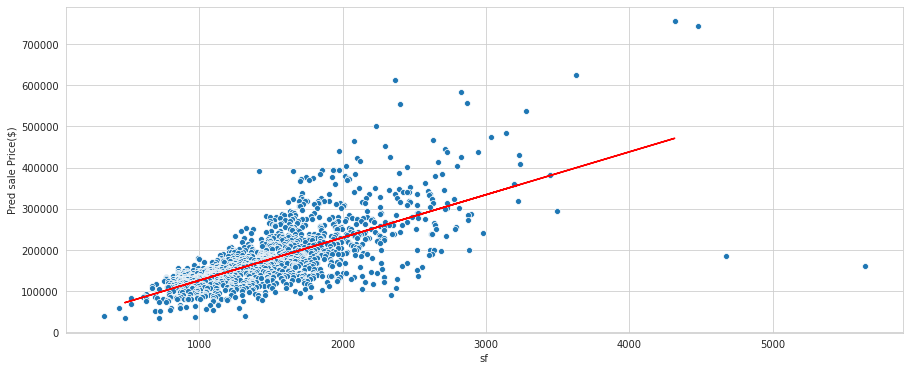

In [31]:
sns.scatterplot(x = 'sf', y = 'saleprice', data = df)
plt.plot(X_test, saleprice_y_pred, color='red')
plt.ylabel('Pred sale Price($)')

Plot the residual

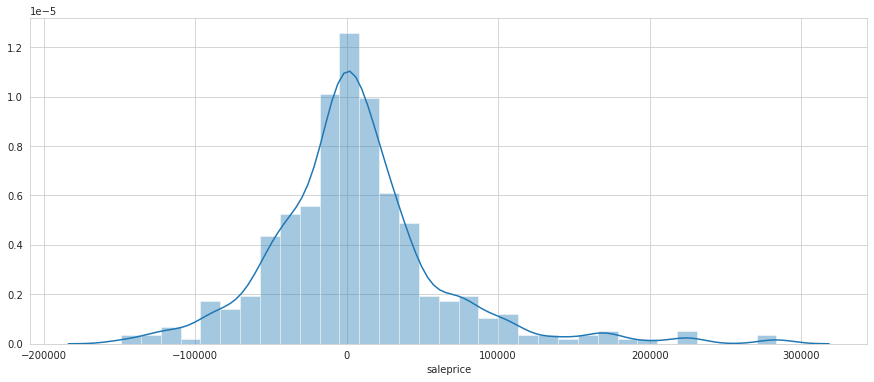

In [25]:
sns.distplot(y_test-saleprice_y_pred)

# Make some predictions

In [26]:
def price(sf):
  coef=lin_reg.coef_
  b=float(coef)
  inter=lin_reg.intercept_
  a=float(inter)
  return round((a+b*sf),1)

In [27]:
price(1000)

126177.6

In [28]:
print("The sale price of a house is {} when the sq footage is 1000".format(price(1000)))

The sale price of a house is 126177.6 when the sq footage is 1000


In [29]:
def sqft(price):
  coef=lin_reg.coef_
  b=float(coef)
  inter=lin_reg.intercept_
  a=float(inter)
  return round((price-a)/b,1)


In [30]:
print("1,000,000 can buy a house with {} sq footage".format(sqft(1000000)))

1,000,000 can buy a house with 9396.4 sq footage


# Conclusion

1.The record with sf=0 were removed before analysis, because it is abnormal that a home without area.

2.From the histogram of the sale price, it is a right-skewed distribution. The average sale price is about $150000.

3.There is a linear relationship between price and square feet, the bigger the house the more expensive will be. 

4.The mean square error was 3267141043.33. Because we are dealing with house prices, which have comparatively large numbers. So, the mean square error was large.

5.the R^2 was 0.54, which means that 54% of the variance in the price can be explained by the square feet.

6.The distribution of residual is a normal distribution. This tells us that the regression model is reliable.